**Problem statement**

> To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution that can evaluate images and alert dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.



In [1]:
#import dataset from google drive
import zipfile
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#unzip the datset file

!unzip "/content/gdrive/MyDrive/CNN_assignment.zip" -d "/content/gdrive/MyDrive/CNN_assignment"

Archive:  /content/gdrive/MyDrive/CNN_assignment.zip
  inflating: /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010512.jpg  
  inflating: /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010889.jpg  
  inflating: /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024468.jpg  
  inflating: /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024470.jpg  
  inflating: /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024511.jpg  
  inflating: /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024646.jpg  
  inflating

In [2]:
#import libraries

import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import plot_model

from glob import glob



**Data Reading/ Data Understanding**

In [3]:
# Defining the path for train and test images
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('/content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [4]:
print("Train dataset")
print(len(list(data_dir_train.glob('*/*.jpg'))))
print(20*"=")
print("Test dataset")
print(len(list(data_dir_test.glob('*/*.jpg'))))

Train dataset
2239
Test dataset
118


### Dataset Creation

In [5]:
# train dataset - make sure to resize image to 180x180
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
                                                              data_dir_train,
                                                              batch_size=32,
                                                              image_size=(180,180),
                                                              label_mode='categorical',
                                                              validation_split=0.2,
                                                              subset="training",
                                                              seed=123
                                                             )

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [6]:
# validation dataset - 180x180 resize
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
                                                              data_dir_train,
                                                              batch_size=32,
                                                              image_size=(180,180),
                                                              label_mode='categorical',
                                                              validation_split=0.2,
                                                              subset="validation",
                                                              seed=123
                                                             )

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [7]:
# test dataset
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
                                                                data_dir_test,
                                                                batch_size=32,
                                                                image_size=(180,180),
                                                                label_mode='categorical',
                                                                seed=123
                                                              )

Found 118 files belonging to 9 classes.


In [8]:
# class name of all skin cancer type
cancer_class = train_ds.class_names
print(cancer_class)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Data Visualisation

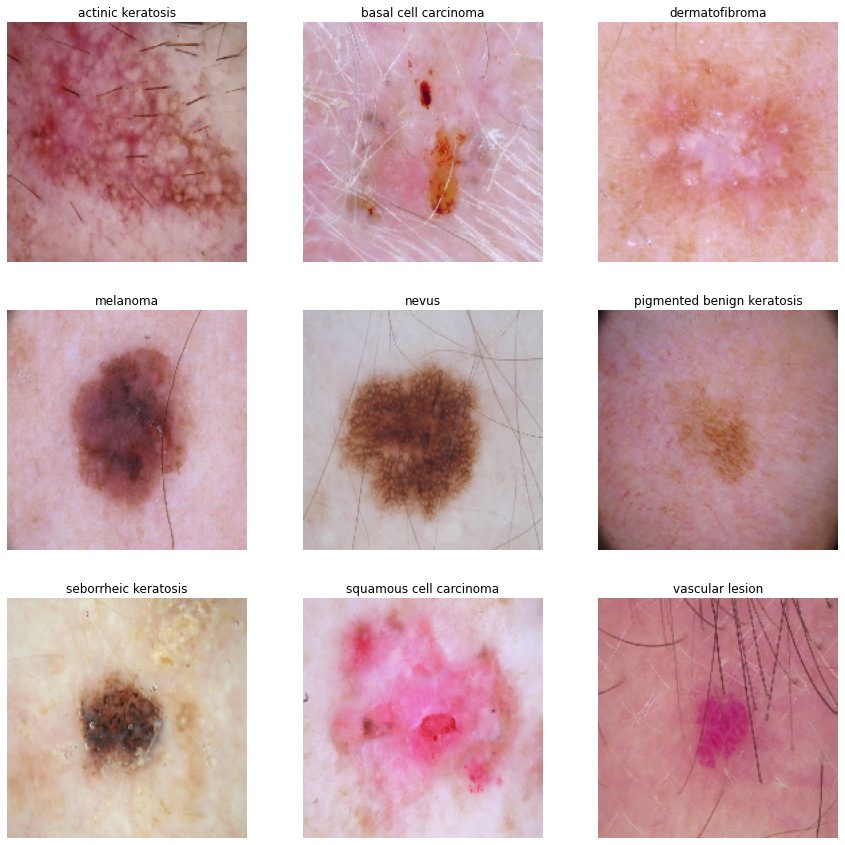

In [9]:
#Store filepath as per class
filePath = {}

for c in cancer_class:
    filePath[c] = list(map(lambda x:str(data_dir_train)+'/'+c+'/'+x,os.listdir(str(data_dir_train)+'/'+c)))
    
#Visualize image
plt.figure(figsize=(15,15))
index = 0
for c in cancer_class:
    path_list = filePath[c][:1]
    index += 1
    plt.subplot(3,3,index)
    plt.imshow(load_img(path_list[0],target_size=(180,180)))
    plt.title(c)
    plt.axis("off")

In [10]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

#### **Create Model**

> 

*   Create a CNN model, which can accurately detect 9 classes present in the dataset. 
Use layers.experimental.preprocessing.Rescaling to normalize pixel values between (0,1). Standardize channel values to be in the [0, 1]
*   Defined with appropriate optimiser and loss function for model training
*   Train the model with 20 epoch


In [11]:
#Create model layer by layer
model = Sequential()

#Normalize pixel values between (0,1)
model.add(layers.experimental.preprocessing.Rescaling(1.0/255.00,input_shape=(180,180,3)))   

#First Convulation layer
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu', padding='same'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Second Convulation Layer
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu', padding='same'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Third Convulation Layer
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu', padding='same'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Dropout layer
model.add(layers.Dropout(0.30))

#Flatten Layer
##Multi-dimensional input tensors into a single dimension.
model.add(layers.Flatten())

#Dense Layer
model.add(layers.Dense(128,activation='relu'))

#Dropout layer with 30% units to drop.
model.add(layers.Dropout(0.30))

#Dense Layer with softmax activation function.
model.add(layers.Dense(len(cancer_class),activation='softmax'))

In [12]:
#Summary of models
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 128)       7

**Compile the model**

In [13]:
# Choose appropriate optimizer and loss function
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

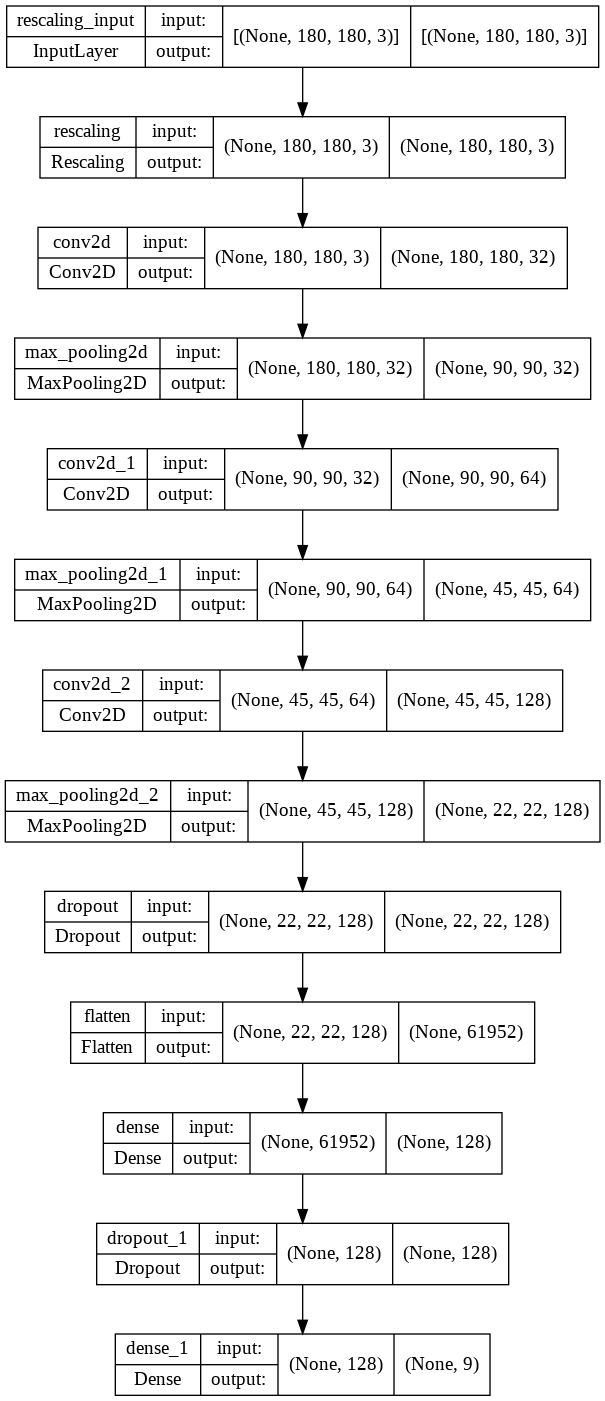

In [14]:
plot_model(model, to_file='modelShow.png', show_shapes=True, show_layer_names=True)

**Train the model**

In [15]:
#train the model with 20 epocs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 142s 2s/step - loss: 2.1370 - accuracy: 0.1908 - val_loss: 2.0035 - val_accuracy: 0.2662
Epoch 2/20
56/56 [==============================] - 122s 2s/step - loss: 1.8906 - accuracy: 0.3147 - val_loss: 1.7222 - val_accuracy: 0.3579
Epoch 3/20
56/56 [==============================] - 128s 2s/step - loss: 1.6413 - accuracy: 0.4224 - val_loss: 1.6487 - val_accuracy: 0.3870
Epoch 4/20
56/56 [==============================] - 122s 2s/step - loss: 1.5015 - accuracy: 0.4526 - val_loss: 1.5068 - val_accuracy: 0.4989
Epoch 5/20
56/56 [==============================] - 123s 2s/step - loss: 1.3964 - accuracy: 0.5184 - val_loss: 1.4913 - val_accuracy: 0.5324
Epoch 6/20
56/56 [==============================] - 122s 2s/step - loss: 1.4402 - accuracy: 0.4955 - val_loss: 1.4558 - val_accuracy: 0.5481
Epoch 7/20
56/56 [==============================] - 126s 2s/step - loss: 1.4061 - accuracy: 0.4972 - val_loss: 1.4945 - val_accuracy: 0.5101
Epoch 8/20
56

**Visualizing training results**

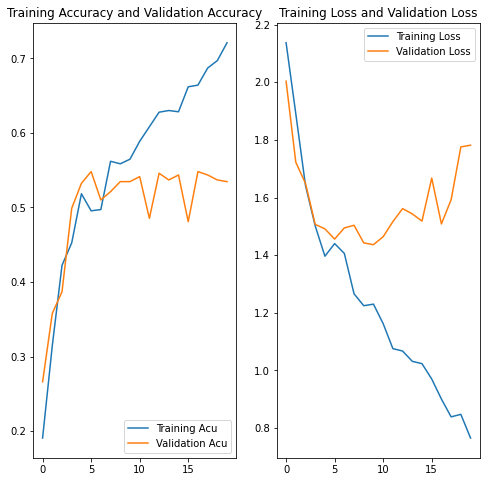

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

#plot a graph of training accuracy and validation accuracy
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Acu')
plt.plot(epochs_range, val_acc, label='Validation Acu')
plt.legend(loc='lower right')
plt.title('Training Accuracy and Validation Accuracy')

#plot a graph of training loss and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training Loss and Validation Loss')
plt.show()


> Training accuracy is high and loss is low whereas Validation accuracy is near to training accuracy and loss is high. The model is overfitting as it is not performing well on unseen data



In [24]:
loss, accuracy = model.evaluate(train_ds, verbose=1,)
loss_v, accuracy_v = model.evaluate(val_ds, verbose=1)

print("Accuracy            : ", accuracy)
print("Validation Accuracy : ", accuracy_v)
print("Loss                : ", loss)
print("Validation Loss     : ", loss_v)

14/14 [==============================] - 8s 539ms/step - loss: 1.7814 - accuracy: 0.5347
Accuracy            :  0.7790178656578064
Validation Accuracy :  0.5346755981445312
Loss                :  0.5915465354919434
Validation Loss     :  1.781412124633789


**Data Augmentation** 

In [26]:
cancer_class = ['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']
print(cancer_class)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [39]:
## Create the model

model_manual_aug = Sequential()

#Rescaling Layer
model_manual_aug.add(layers.experimental.preprocessing.Rescaling(1.0/255.00,input_shape=(180,180,3)))   

#First Convulation layer
model_manual_aug.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu', padding='same'))
model_manual_aug.add(layers.MaxPool2D(pool_size=(2,2)))

#Second Convulation Layer
model_manual_aug.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu', padding='same'))
model_manual_aug.add(layers.MaxPool2D(pool_size=(2,2)))

#Third Convulation Layer
model_manual_aug.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu', padding='same'))
model_manual_aug.add(layers.MaxPool2D(pool_size=(2,2)))

#Dropout layer with 30% units to drop.
model_manual_aug.add(layers.Dropout(0.30))

#Flatten Layer
##flattens the multi-dimensional input tensors into a single dimension.
model_manual_aug.add(layers.Flatten())

#Dense Layer
model_manual_aug.add(layers.Dense(128,activation='relu'))

#Dropout layer with 30% units to drop.
model_manual_aug.add(layers.Dropout(0.30))

#Dense Layer with softmax activation function.
model_manual_aug.add(layers.Dense(len(cancer_class),activation='softmax'))

In [40]:
# Summary of all layers
model_manual_aug.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 90, 90, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 45, 45, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 45, 45, 128)      

In [41]:
# compile
model_manual_aug.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [42]:
#train
epochs = 20
history_manual_aug = model_manual_aug.fit(
                                            train_ds,
                                            #batch_size=batch_size,
                                            validation_data=val_ds,
                                            epochs=epochs
                                          )

Epoch 1/20
56/56 [==============================] - 135s 2s/step - loss: 2.2297 - accuracy: 0.1858 - val_loss: 2.0378 - val_accuracy: 0.1499
Epoch 2/20
56/56 [==============================] - 123s 2s/step - loss: 1.9568 - accuracy: 0.2517 - val_loss: 1.8593 - val_accuracy: 0.3244
Epoch 3/20
56/56 [==============================] - 121s 2s/step - loss: 1.8026 - accuracy: 0.3393 - val_loss: 1.6104 - val_accuracy: 0.4631
Epoch 4/20
56/56 [==============================] - 121s 2s/step - loss: 1.5880 - accuracy: 0.4420 - val_loss: 1.4231 - val_accuracy: 0.5369
Epoch 5/20
56/56 [==============================] - 121s 2s/step - loss: 1.4721 - accuracy: 0.4950 - val_loss: 1.4118 - val_accuracy: 0.5302
Epoch 6/20
56/56 [==============================] - 121s 2s/step - loss: 1.3709 - accuracy: 0.5290 - val_loss: 1.3880 - val_accuracy: 0.5235
Epoch 7/20
56/56 [==============================] - 121s 2s/step - loss: 1.3089 - accuracy: 0.5391 - val_loss: 1.3491 - val_accuracy: 0.5526
Epoch 8/20
56

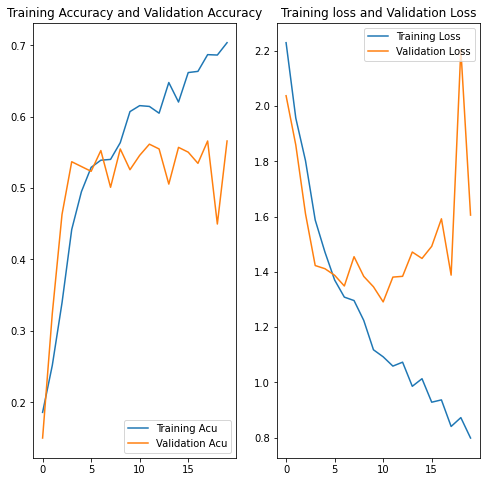

In [43]:
acc = history_manual_aug.history['accuracy']
val_acc = history_manual_aug.history['val_accuracy']

loss = history_manual_aug.history['loss']
val_loss = history_manual_aug.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Acu')
plt.plot(epochs_range, val_acc, label='Validation Acu')
plt.legend(loc='lower right')
plt.title('Training Accuracy and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training loss and Validation Loss')
plt.show()


> Rotation of 30 was not useful, very low accuracy and high loss on both training and validation. Model is underfitting as accuracy is low on both seen and unseen data

**Class Distribution**

In [44]:
path_list=[]
lesion_list=[]

In [45]:
#Find the distribution of classes in the training dataset
for i in cancer_class:
  for j in data_dir_train.glob(i+'/*.jpg'):
    path_list.append(str(j))
    lesion_list.append(i)

In [46]:
df_dict = dict(zip(path_list, lesion_list))

In [47]:
original_df = pd.DataFrame(list(df_dict.items()),columns = ['Path','Label'])
print(original_df.Label.value_counts())

pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
Name: Label, dtype: int64


Text(0.5, 1.0, 'Images per class')

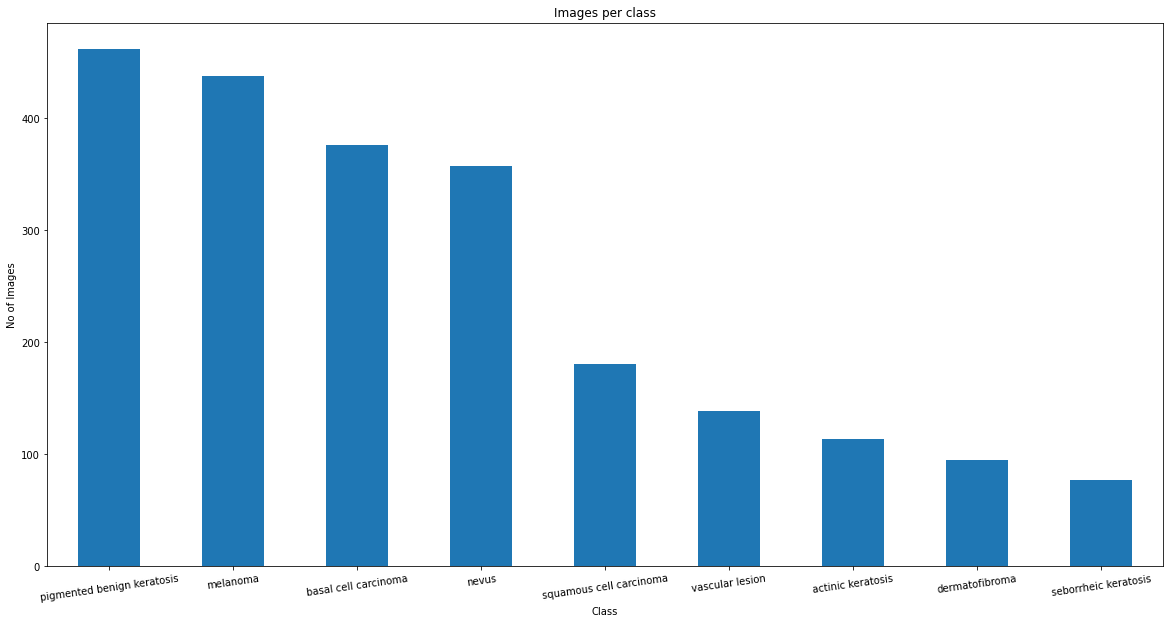

In [48]:
#visualize class distribution

original_df.Label.value_counts().plot(kind='bar', figsize=(20, 10), rot=8)
plt.xlabel("Class")
plt.ylabel("No of Images")
plt.title("Images per class")

Seborrheic keratosis class has the least number of samples. Pigmented benign has more samples. Melanoma and basal cell carcinoma classes has more proportionate number of samples

In [49]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Handling class imbalances**


In [51]:
path_to_training_dataset="/content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in cancer_class:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500)

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FA0B5B6AB90>: 100%|██████████| 500/500 [00:22<00:00, 22.20 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FA0B981B350>: 100%|██████████| 500/500 [00:22<00:00, 22.05 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FA0B5B9D790>: 100%|██████████| 500/500 [00:22<00:00, 21.90 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x7FA0B9338050>: 100%|██████████| 500/500 [01:42<00:00,  4.88 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=824x719 at 0x7FA0B934C410>: 100%|██████████| 500/500 [01:41<00:00,  4.91 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FA0B5A91C50>: 100%|██████████| 500/500 [00:26<00:00, 18.66 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FA0B9341890>: 100%|██████████| 500/500 [00:50<00:00,  9.97 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FA0BCE6E250>: 100%|██████████| 500/500 [00:23<00:00, 21.56 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FA0BCF42A90>: 100%|██████████| 500/500 [00:22<00:00, 21.86 Samples/s]


Display total count of augmented images.

In [52]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


Distribution of augmented data after adding new images to the original training data.

In [53]:
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new

['/content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0031228.jpg_7e7e075f-2892-4d72-88a2-02eb8f8f0329.jpg',
 '/content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0029827.jpg_f201aae3-4fd9-4cc7-9623-e968ec3f5bd0.jpg',
 '/content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0027950.jpg_ce4c49d6-0084-4703-bb27-235617b371df.jpg',
 '/content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0028820.jpg_bb3ca9ee-0215-4d22-bd06-223f390d7191.jpg',
 '/content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic

In [54]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [55]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [56]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

**Train the model on the data created using Augmentor** 

In [58]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
                                                                data_dir_train,
                                                                seed=123,
                                                                validation_split = 0.2,
                                                                subset = "training",
                                                                image_size = (180, 180),
                                                                batch_size = 32
                                                               )

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [60]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
                                                              data_dir_train,
                                                              seed=123,
                                                              validation_split = 0.2,
                                                              subset = "validation",
                                                              image_size=(180, 180),
                                                              batch_size=32
                                                             )

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [62]:
#Sequential allows you to create models layer-by-layer  
model_Augmentor = Sequential()

#Rescaling Layer
model_Augmentor.add(layers.experimental.preprocessing.Rescaling(1.0/255.00,input_shape=(180,180,3)))   

#First Convulation layer
model_Augmentor.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu', padding='same'))
model_Augmentor.add(layers.MaxPool2D(pool_size=(2,2)))

#Second Convulation Layer
model_Augmentor.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu', padding='same'))
model_Augmentor.add(layers.MaxPool2D(pool_size=(2,2)))

#Third Convulation Layer
model_Augmentor.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu', padding='same'))
model_Augmentor.add(layers.MaxPool2D(pool_size=(2,2)))

#Dropout layer with 30% units to drop.
model_Augmentor.add(layers.Dropout(0.30))

#Flatten Layer
model_Augmentor.add(layers.Flatten())

#Dense Layer
model_Augmentor.add(layers.Dense(128,activation='relu'))

#Dropout layer with 30% units to drop.
model_Augmentor.add(layers.Dropout(0.30))

#Dense Layer with softmax activation function.
model_Augmentor.add(layers.Dense(len(cancer_class),activation='softmax'))

In [63]:
# View the summary of all layers
model_Augmentor.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_5 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 90, 90, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 45, 45, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 45, 45, 128)      

In [64]:
model_Augmentor.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

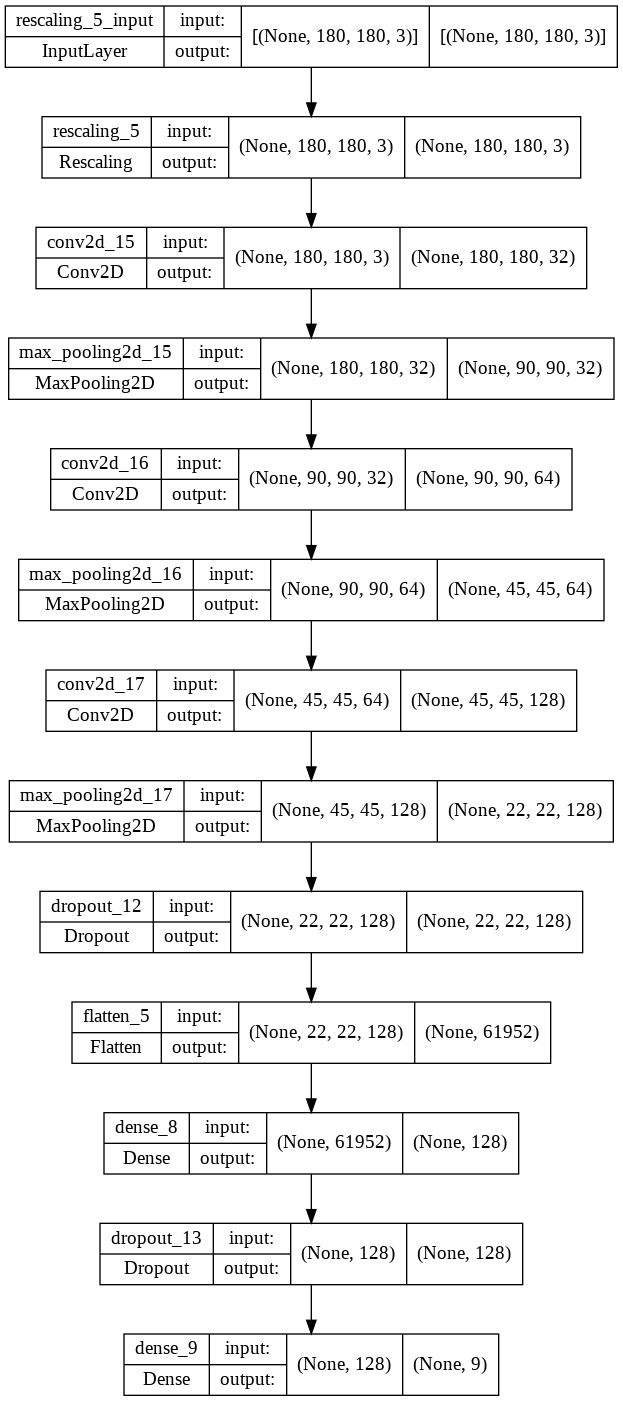

In [65]:
# Visualize the model
plot_model(model_Augmentor, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [66]:
#train the model
epochs = 30
history_Augmentor = model_Augmentor.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 399s 2s/step - loss: 1.9365 - accuracy: 0.2704 - val_loss: 1.6317 - val_accuracy: 0.3771
Epoch 2/30
169/169 [==============================] - 392s 2s/step - loss: 1.5652 - accuracy: 0.4086 - val_loss: 1.4118 - val_accuracy: 0.5011
Epoch 3/30
169/169 [==============================] - 392s 2s/step - loss: 1.3597 - accuracy: 0.4833 - val_loss: 1.2104 - val_accuracy: 0.5679
Epoch 4/30
169/169 [==============================] - 390s 2s/step - loss: 1.2347 - accuracy: 0.5425 - val_loss: 1.1542 - val_accuracy: 0.5947
Epoch 5/30
169/169 [==============================] - 390s 2s/step - loss: 1.0734 - accuracy: 0.6061 - val_loss: 1.1730 - val_accuracy: 0.5917
Epoch 6/30
169/169 [==============================] - 389s 2s/step - loss: 0.9749 - accuracy: 0.6382 - val_loss: 0.9952 - val_accuracy: 0.6444
Epoch 7/30
169/169 [==============================] - 391s 2s/step - loss: 0.8245 - accuracy: 0.7068 - val_loss: 1.0865 - val_accuracy: 0.6392

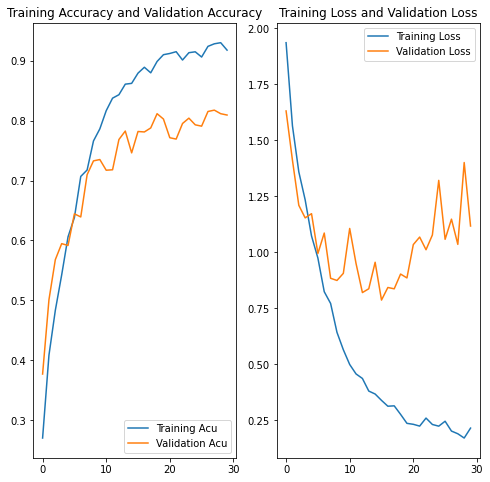

In [67]:
acc = history_Augmentor.history['accuracy']
val_acc = history_Augmentor.history['val_accuracy']

loss = history_Augmentor.history['loss']
val_loss = history_Augmentor.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Acu')
plt.plot(epochs_range, val_acc, label='Validation Acu')
plt.legend(loc='lower right')
plt.title('Training Accuracy and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training Loss and Validation Loss')
plt.show()

In [69]:
loss, accuracy = model_Augmentor.evaluate(train_ds, verbose=1,)
loss_v, accuracy_v = model_Augmentor.evaluate(val_ds, verbose=1)

print("Accuracy            : ", accuracy)
print("Validation Accuracy : ",accuracy_v)
print(20*"-")
print("Loss                : ",loss)
print("Validation Loss     : ", loss_v)

43/43 [==============================] - 30s 676ms/step - loss: 1.1178 - accuracy: 0.8092
Accuracy            :  0.9603115916252136
Validation Accuracy :  0.8092056512832642
--------------------
Loss                :  0.10217104852199554
Validation Loss     :  1.1177705526351929


There is high train accuracy and validation accurancy is also considerably reduced. Model has performed better than previous model